In [712]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

### Attempt 1: Linear regression and label encoder

In [713]:
data = pd.read_csv(r"C:\Users\PRADYUM\Desktop\CallVoiceQualityExperience-2018-April.csv")
data

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar
5,RJio,Travelling,4G,4,Satisfactory,14.913321,79.993797,Andhra Pradesh
6,Airtel,Travelling,4G,1,Satisfactory,19.937326,73.536190,Maharashtra
7,RJio,Outdoor,4G,4,Satisfactory,26.892033,75.725724,Rajasthan
8,RJio,Indoor,4G,5,Satisfactory,20.287829,85.864832,Odisha
9,RJio,Indoor,4G,2,Satisfactory,9.426251,77.802405,Tamil Nadu


In [714]:
data.describe()

,Rating,Latitude,Longitude
count,63336.000000,63336.000000,63336.000000
mean,3.449997,15.302685,58.476530
std,1.450042,10.677228,34.786382
min,1.000000,-1.000000,-69.065625
25%,2.000000,0.000000,0.000000
50%,4.000000,18.551622,76.855947
75%,5.000000,23.081384,78.509881
max,5.000000,34.273785,96.171616


In [715]:
data.isnull().sum()

Operator                         0
Indoor_Outdoor_Travelling        0
Network Type                     0
Rating                           0
Call Drop Category               0
Latitude                         0
Longitude                        0
State Name                   15966
dtype: int64

In [716]:
data.drop(['State Name','Network Type','Operator'], axis=1, inplace=True)

In [717]:
data.shape

(63336, 5)

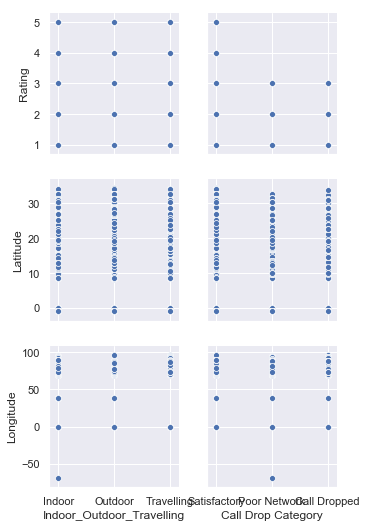

In [718]:
sns.pairplot(data=data,
    y_vars=['Rating','Latitude','Longitude'],
    x_vars=['Indoor_Outdoor_Travelling',  'Call Drop Category'])

In [719]:
data

,Indoor_Outdoor_Travelling,Rating,Call Drop Category,Latitude,Longitude
0,Indoor,5,Satisfactory,28.422966,76.912324
1,Indoor,4,Satisfactory,11.158358,77.301897
2,Outdoor,5,Satisfactory,28.422931,76.912253
3,Travelling,5,Satisfactory,28.422947,76.912260
4,Indoor,5,Satisfactory,25.625990,85.094294
5,Travelling,4,Satisfactory,14.913321,79.993797
6,Travelling,1,Satisfactory,19.937326,73.536190
7,Outdoor,4,Satisfactory,26.892033,75.725724
8,Indoor,5,Satisfactory,20.287829,85.864832
9,Indoor,2,Satisfactory,9.426251,77.802405


In [720]:
data.dropna(subset=['Latitude'], inplace=True)
data.dropna(subset=['Longitude'], inplace=True)

In [721]:
data

,Indoor_Outdoor_Travelling,Rating,Call Drop Category,Latitude,Longitude
0,Indoor,5,Satisfactory,28.422966,76.912324
1,Indoor,4,Satisfactory,11.158358,77.301897
2,Outdoor,5,Satisfactory,28.422931,76.912253
3,Travelling,5,Satisfactory,28.422947,76.912260
4,Indoor,5,Satisfactory,25.625990,85.094294
5,Travelling,4,Satisfactory,14.913321,79.993797
6,Travelling,1,Satisfactory,19.937326,73.536190
7,Outdoor,4,Satisfactory,26.892033,75.725724
8,Indoor,5,Satisfactory,20.287829,85.864832
9,Indoor,2,Satisfactory,9.426251,77.802405


In [722]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler 
from sklearn.linear_model import Lasso, LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, train_test_split

# label encoder
lb = LabelEncoder()
data['Call Drop Category'] = lb.fit_transform(data['Call Drop Category'])


lb = LabelEncoder()
data['Indoor_Outdoor_Travelling'] = lb.fit_transform(data['Indoor_Outdoor_Travelling'])


data['Call Drop Category'].unique()

data

,Indoor_Outdoor_Travelling,Rating,Call Drop Category,Latitude,Longitude
0,0,5,2,28.422966,76.912324
1,0,4,2,11.158358,77.301897
2,1,5,2,28.422931,76.912253
3,2,5,2,28.422947,76.912260
4,0,5,2,25.625990,85.094294
5,2,4,2,14.913321,79.993797
6,2,1,2,19.937326,73.536190
7,1,4,2,26.892033,75.725724
8,0,5,2,20.287829,85.864832
9,0,2,2,9.426251,77.802405


In [723]:
data.drop(['Call Drop Category'], axis=1, inplace=True)

X = np.array(data)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=25)

lr = Lasso(alpha= 0.6, max_iter=5000, random_state=25)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [724]:
print(y_test)

[28.57768123 21.34968819 12.98212526 ... 20.27142584 22.82965573
 22.6567485 ]


In [725]:
print(X)

[[ 0.          5.         28.42296647 76.91232449]
 [ 0.          4.         11.15835753 77.30189698]
 [ 1.          5.         28.42293129 76.91225267]
 ...
 [ 2.          4.         19.408291   72.8387355 ]
 [ 0.          4.         30.3231174  78.0015411 ]
 [ 0.          5.         -1.         -1.        ]]


In [726]:
print(X_test)

[[ 0.          5.         28.57768123 77.08196246]
 [ 0.          5.         21.34968819 83.64230859]
 [ 0.          4.         12.98212526 80.167572  ]
 ...
 [ 1.          3.         20.27142584 85.79532915]
 [ 2.          4.         22.82965573 70.86620375]
 [ 0.          4.         22.6567485  88.3468574 ]]


In [727]:
print('Test Accuracy score: ', r2_score(y_test, y_pred))

Test Accuracy score:  0.9999318573708615


The linear regression model is overfitting

### Attempt 2: Single Class Classification for Call Drop Category

In this attempt I will try and predict the 'Satisfatory' Call Drop Category

In [728]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [729]:
df = pd.read_csv(r"C:\Users\PRADYUM\Desktop\CallVoiceQualityExperience-2018-April.csv")
df

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar
5,RJio,Travelling,4G,4,Satisfactory,14.913321,79.993797,Andhra Pradesh
6,Airtel,Travelling,4G,1,Satisfactory,19.937326,73.536190,Maharashtra
7,RJio,Outdoor,4G,4,Satisfactory,26.892033,75.725724,Rajasthan
8,RJio,Indoor,4G,5,Satisfactory,20.287829,85.864832,Odisha
9,RJio,Indoor,4G,2,Satisfactory,9.426251,77.802405,Tamil Nadu


In [730]:
df.describe()

,Rating,Latitude,Longitude
count,63336.000000,63336.000000,63336.000000
mean,3.449997,15.302685,58.476530
std,1.450042,10.677228,34.786382
min,1.000000,-1.000000,-69.065625
25%,2.000000,0.000000,0.000000
50%,4.000000,18.551622,76.855947
75%,5.000000,23.081384,78.509881
max,5.000000,34.273785,96.171616


In [731]:
df.shape

(63336, 8)

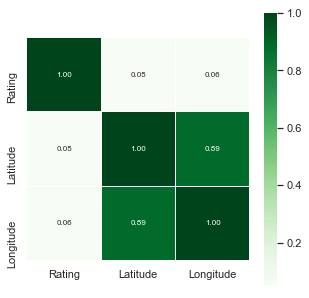

In [732]:
cor=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(cor,cmap=plt.cm.Greens,annot=True,fmt='.2f',square=True,annot_kws={'size':8},linewidths=0.1)

Latitude and Longitude have very high correlation

In [733]:
df.dtypes

Operator                      object
Indoor_Outdoor_Travelling     object
Network Type                  object
Rating                         int64
Call Drop Category            object
Latitude                     float64
Longitude                    float64
State Name                    object
dtype: object

Text(0.5, 1.0, 'Rating vs Call Drop Category')

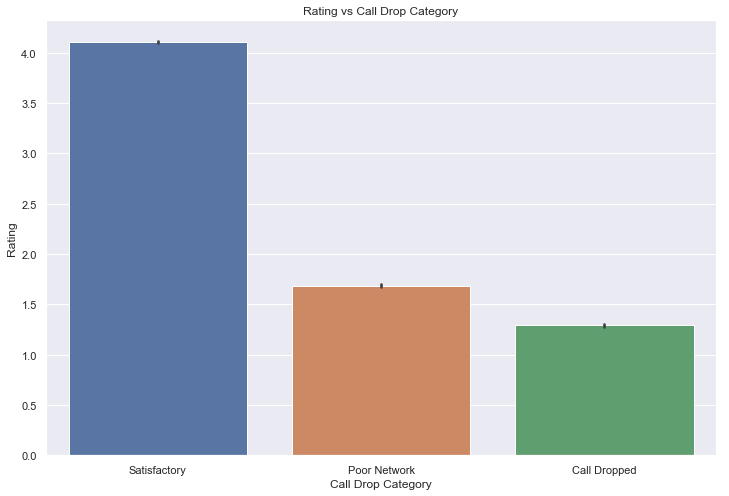

In [734]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Call Drop Category', y = 'Rating', data = df)

plt.title("Rating vs Call Drop Category")

In [735]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Call Drop Category,State Name
0,Airtel,Indoor,3G,Satisfactory,Haryana
1,RJio,Indoor,4G,Satisfactory,Tamil Nadu
2,Airtel,Outdoor,3G,Satisfactory,Haryana
3,Airtel,Travelling,3G,Satisfactory,Haryana
4,RJio,Indoor,4G,Satisfactory,Bihar


In [736]:
obj_df[obj_df.isnull().any(axis=1)].head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Call Drop Category,State Name
10,Idea,Outdoor,Unknown,Satisfactory,NaN
13,BSNL,Indoor,3G,Poor Network,NaN
15,Vodafone,Outdoor,Unknown,Satisfactory,NaN
22,Airtel,Indoor,3G,Poor Network,NaN
24,RJio,Indoor,Unknown,Poor Network,NaN


#### A lot of state name data is not available, we will drop it for now.

In [775]:
Indoor_Outdoor_Travelling = pd.get_dummies(df['Indoor_Outdoor_Travelling'], drop_first = True)
Network_Type = pd.get_dummies(df['Network Type']) 
Operator = pd.get_dummies(df['Operator'], drop_first = True)
Call_Drop_Category = pd.get_dummies(df['Call Drop Category'], drop_first = True)
Rating = pd.get_dummies(df['Rating'], drop_first = True)

X = pd.concat([df.Rating, df.Latitude, df.Longitude, Indoor_Outdoor_Travelling, Network_Type, Operator, Rating], axis = 1)
X.drop(['Longitude','Rating'], axis = 1, inplace = True)
X

,Latitude,Outdoor,Travelling,2G,3G,4G,Unknown,BSNL,Idea,MTNL,Other,RComm,RJio,Tata,Telenor,Vodafone,2,3,4,5
0,28.422966,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,11.158358,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,28.422931,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,28.422947,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,25.625990,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,14.913321,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,19.937326,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,26.892033,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8,20.287829,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9,9.426251,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [776]:
X.drop(['Unknown'], axis = 1, inplace = True)
Y = pd.get_dummies(df["Call Drop Category"], prefix=["Call Drop Category"])
Y1 = Y.iloc[:,-1]
Y2 = Y.iloc[:,-2]

In [777]:
X.columns = X.columns.map(str)

In [778]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=35)

In [779]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg.fit(X_train, y_train)
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
dictionary

{'Latitude': -0.01624730091189586,
 'Outdoor': -0.458639638951121,
 'Travelling': 0.016867662717996793,
 '2G': -0.6478298684093432,
 '3G': -0.9411111000224514,
 '4G': -1.0696896637918116,
 'BSNL': -0.23168704582780772,
 'Idea': -0.9475117953129201,
 'MTNL': 0.6323709958185322,
 'Other': -1.480731209754418,
 'RComm': -2.7160281259472,
 'RJio': -0.10047264568770845,
 'Tata': -0.36376301615801093,
 'Telenor': 2.05414352277527,
 'Vodafone': -0.8826802755317782,
 '2': 1.0978740248414716,
 '3': 1.8243606099731253,
 '4': 11.117218135696234,
 '5': 11.093711933229498}

In [780]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg.fit(X_train, y_train)
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
dictionary

{'Latitude': -0.01624730091189586,
 'Outdoor': -0.458639638951121,
 'Travelling': 0.016867662717996793,
 '2G': -0.6478298684093432,
 '3G': -0.9411111000224514,
 '4G': -1.0696896637918116,
 'BSNL': -0.23168704582780772,
 'Idea': -0.9475117953129201,
 'MTNL': 0.6323709958185322,
 'Other': -1.480731209754418,
 'RComm': -2.7160281259472,
 'RJio': -0.10047264568770845,
 'Tata': -0.36376301615801093,
 'Telenor': 2.05414352277527,
 'Vodafone': -0.8826802755317782,
 '2': 1.0978740248414716,
 '3': 1.8243606099731253,
 '4': 11.117218135696234,
 '5': 11.093711933229498}

In [781]:
y_pred = logreg.predict(X_test)

In [782]:
from sklearn import metrics
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred))

Test Accuracy score:  0.8967477107672877
Test F1 score:  0.9296849801096657


In [783]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y1, test_size=0.2, random_state=35)

In [784]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
classes = ['0','1']

Confusion Matrix, without normalization
[[2713  582]
 [ 726 8647]]


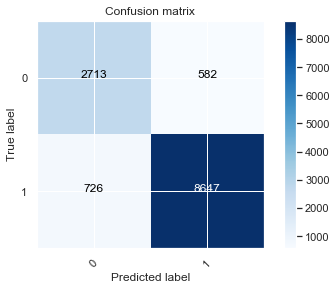

In [785]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [786]:
from sklearn.model_selection import GridSearchCV
# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space, these are penalty sizes
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv=5, scoring='f1') 

# Fit grid search
model = clf_gs.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.5


In [787]:
y_pred_train = model.best_estimator_.predict(X_train)

y_pred_test = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.9322504808719813
Testing F1 Score: 0.9342971887550201


### Looks Good

### Attempt 3: Multi-Label Classification: 

Here I will attempt to predict all the three classes of the Call Drop category using multi-label classification

### Will use: 

        Binary Relevance
        
        Classifier Chains
        
        Label Powerset

In [758]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

X_train = X[:-12668]
X_test = X[-12668:]
y_train = Y[:-12668]
y_test = Y[-12668:]
# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)

0.6171455636248816

In [759]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.naive_bayes import GaussianNB

# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
classifier = ClassifierChain(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.6915061572466056

In [760]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

accuracy_score(y_test,predictions)

0.7335806757183454

## 73.5 % accuracy for Call Drop Category using Multi-label classification